In [1]:
#imports in a seperate block, as you might want to run seperate blocks instead
#if you dont have excel, you will need to run mostly all code segments
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
#gathering data from online database
data = pd.DataFrame()
for i in range(2022, 2025):
    for j in range(1, 13):
        url = f"https://acqa.u-angers.fr/data/{i}/{j}"
        response = requests.get(url)
        temp_data = pd.read_csv(url, sep=';')
        # Convert "date" column to datetime format
        temp_data['date'] = pd.to_datetime(temp_data['date'], format='%Y-%m-%d %H:%M:%S')
        # Concatenate the file data with existing data in the DataFrame object
        data = pd.concat([data, temp_data])

C:\Users\Sas\AppData\Local\Temp\ipykernel_9148\1059812288.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp_data])
C:\Users\Sas\AppData\Local\Temp\ipykernel_9148\1059812288.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, temp_data])
C:\Users\Sas\AppData\Local\Temp\ipykernel_9148\1059812288.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer e

In [3]:
#arranging the data by sensor name
# Get the current system date and time and convert them to a string in the format "YYYY-MM-DD HH:MM:SS"
#now = datetime.now()
now = datetime(2024, 6, 1, 0, 0, 0) #upper bound
dt_string = now.strftime("%Y-%m-%d %H:%M:%S")

#CHANGE TO OBSERVE DIFFERENT SENSORS
#some code might not change as it was not written with this in mind
sensors =  ['FABLAB1', 'FABLAB2', 'FABLAB3', 'FABLAB4', 'FABTEST1', 'FABTEST2', 'FABTEST3', 'FABTEST4', 'STSORANGE', 'STSROSE', 'STSVERT', 'STSJAUNE', 'BUREAU_ALAIN']

# Loop through sensor names
for sensor_name in sensors:
    # Extract data for sensor
    Variable = data[data.sensor == sensor_name]
    # Create a pandas DataFrame object to store the extracted data, using the "date" column as an index
    #data_frame_to_export = pd.DataFrame.from_records(Variable, index='date') #deprecated
    data_frame_to_export = pd.DataFrame(Variable).set_index('date')
    # Add empty rows for the dates: start of monitoring and end of monitoring (to have dataframes of the same size for all sensors)
    data_frame_to_export.loc[datetime(2022, 6, 1, 0, 0, 0)] = ['', '', '', '' ,'', '','','','','','','','','','','']
    data_frame_to_export.loc[datetime.strptime(dt_string, '%Y-%m-%d %H:%M:%S')] = ['', '', '', '' ,'', '','','','','','','','','','','']
    data_frame_to_export = data_frame_to_export.sort_index()
    # Export the extracted data to an Excel file with the sensor name
    data_frame_to_export.to_excel(sensor_name + ".xlsx")
    # data_frame_to_export.to_csv(sensor_name + ".csv")

In [4]:
#saving data into excel
# Retrieving the current date and time
start_date = '2022-06-01 00:00'
now = datetime.now()
dt_string = now.strftime("%Y-%m-%d %H:%M:%S")
# Loop through the list of sensor names
for sensor_name in sensors:
    date_file = f"{sensor_name}.xlsx"
    # date_file = f"/content/{sensor_name}.csv"
    # Reading data from Excel file and formatting index
    data_to_convert = pd.read_excel(str(date_file), index_col='date')
    # data_to_convert = pd.read_csv(str(date_file), index_col='date')
    data_to_convert.index = pd.to_datetime(data_to_convert.index, format='%Y-%m-%d %H:%M:%S')


    # Calculating the average of the data for each 10 minute period
    mean_data = data_to_convert.loc[start_date : dt_string, ['co2', 'temperature', 'humidity', 'voc', 'c2h5oh', 'co', 'no2', 'sound', 'light', 'pm1.0', 'pm2.5', 'pm10']].resample('10min').agg(['mean'])
    mean_data.columns = mean_data.columns.droplevel(level=1)
    # Saving results to an Excel file
    mean_data.to_excel("mean_" + str(sensor_name) + ".xlsx")
    # mean_data.to_csv("mean_" + str(sensor_name) + ".csv")


In [ ]:
#save data of each parameter separately
# Create empty pandas DataFrames to store data for each parameter
co2 = pd.DataFrame()
temperature = pd.DataFrame()
humidity = pd.DataFrame()
voc = pd.DataFrame()
c2h5oh = pd.DataFrame()
co = pd.DataFrame()
no2 = pd.DataFrame()
sound = pd.DataFrame()
light = pd.DataFrame()
pm1 = pd.DataFrame()
pm2_5 = pd.DataFrame()
pm10 = pd.DataFrame()

# For each parameter, extract data from the corresponding Excel file and store in the appropriate DataFrames
for sensor_name in sensors:
    date_file = f"mean_{sensor_name}.xlsx"
    mean_data = pd.read_excel(str(date_file), index_col='date')

    co2[sensor_name] = mean_data['co2']#.where((mean_data['co2'] >= 0) & (mean_data['co2'] <= 3000), other=np.nan)
    temperature[sensor_name] = mean_data['temperature']
    humidity[sensor_name] = mean_data['humidity']
    voc[sensor_name] = mean_data['voc']
    c2h5oh[sensor_name] = mean_data['c2h5oh']
    co[sensor_name] = mean_data['co']
    no2[sensor_name] = mean_data['no2']
    sound[sensor_name] = mean_data['sound']
    light[sensor_name] = mean_data['light']
    pm1[sensor_name] = mean_data['pm1.0']
    pm2_5[sensor_name] = mean_data['pm2.5']
    pm10[sensor_name] = mean_data['pm10']

# Export each DataFrame to a separate Excel file
co2.to_excel("All_Co2.xlsx")
temperature.to_excel("All_temperature.xlsx")
humidity.to_excel("All_humidity.xlsx")
voc.to_excel("All_voc.xlsx")
c2h5oh.to_excel("All_c2h5oh.xlsx")
co.to_excel("All_co.xlsx")
no2.to_excel("All_no2.xlsx")
sound.to_excel("All_sound.xlsx")
light.to_excel("All_light.xlsx")
pm1.to_excel("All_pm1.xlsx")
pm2_5.to_excel("All_pm2_5.xlsx")
pm10.to_excel("All_pm10.xlsx")


In [ ]:
#displays the amount of recorded non-null entries
#helper
co2['time'] = co2.index.strftime('%H:%M')

# Create an empty DataFrame to store counts
counts_df = pd.DataFrame(columns=['FABLAB1', 'FABLAB2', 'FABLAB3', 'FABLAB4'])

# Loop through each time interval
for h in range(0, 24):
    for m in range(0, 60, 10):
        temp_time = f"{h:02d}:{m:02d}"
        temp_co2 = co2.loc[co2['time'] == temp_time]
        #temp_co2 = co2.loc[(co2.index >= start_date) & (co2.index <= end_date) & (co2['time'] == temp_time)]

        # Calculate the count for each sensor ('FABLAB1', 'FABLAB2', 'FABLAB3', 'FABLAB4')
        counts = temp_co2[['FABLAB1', 'FABLAB2', 'FABLAB3', 'FABLAB4']].count()

        # Append counts to the counts DataFrame
        counts_df.loc[temp_time] = counts

# Plotting
plt.plot(counts_df.index, counts_df)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Count of non-null entries for each sensor')
plt.legend(['FABLAB1', 'FABLAB2', 'FABLAB3', 'FABLAB4'], title='Sensor')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=6)) # assuming your data is every 10 minutes, so 60 minutes / 10 minutes = 6

# Show plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [75]:
#calculating and plotting average day for CO2 sensor
#remember to change start_date and end_date for desired ranges
''' #is not used in code
holiday_dates_2023 = ['2023-01-01', '2023-01-02', '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24', '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20', '2023-04-21', '2023-07-17',
                      '2023-07-18', '2023-07-19', '2023-07-20', '2023-07-21', '2023-07-22', '2023-07-23', '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27', '2023-07-28', '2023-07-29', '2023-07-30',
                      '2023-07-31', '2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04', '2023-08-05', '2023-08-06', '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10', '2023-08-11', '2023-08-12',
                      '2023-08-13', '2023-08-14', '2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03', '2023-12-25', '2023-12-26',
                      '2023-12-27', '2023-12-28', '2023-12-29', '2023-12-30', '2023-12-31']
# Convert holiday dates to datetime objects
holiday_dates = pd.to_datetime(holiday_dates_2023)
'''

co2avg_work = pd.DataFrame()
co2avg_wend = pd.DataFrame()
co2['time'] = co2.index.strftime('%H:%M').astype(str)  #helper

start_date = datetime(2023, 6, 10, 0, 0, 0) #2022-6 or 2023-4
end_date = datetime(2024, 3, 1, 0, 0, 0) #2024-6

for h in range(0, 24):
    for m in range(0, 60, 10):
        temp_time = f"{h:02d}:{m:02d}"
        #co2workdays =  #& (~co2.index.floor('D').isin(holiday_dates))]
        #co2weekends =  #| (co2.index.floor('D').isin(holiday_dates)))]
        for sensor_name in sensors:
            co2avg_work.loc[temp_time, sensor_name] = co2[sensor_name].loc[(co2.index >= start_date) & (co2.index <= end_date) & (co2['time'] == temp_time) & (co2.index.weekday < 5)].mean()
            co2avg_wend.loc[temp_time, sensor_name] = co2[sensor_name].loc[(co2.index >= start_date) & (co2.index <= end_date) & (co2['time'] == temp_time) & ((co2.index.weekday >= 5))].mean()

co2 = co2.drop(columns=['time']) #drop helper to not affect other code (can be kept for future?)

for sensor_name in sensors:
    plt.figure()  # Start a new figure for each plot
    
    # Plotting the line graphs
    plt.plot(co2avg_work.index, co2avg_work[sensor_name], color='blue', label='CO2 workdays')
    plt.plot(co2avg_wend.index, co2avg_wend[sensor_name], color='red', label='CO2 weekends')
    
    # Adding labels and title
    plt.xlabel('Time')
    plt.ylabel('CO2 levels')
    plt.title(f'Comparison of {sensor_name} between workdays and weekends')
    
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=6))  # assuming your data is every 10 minutes, so 60 minutes / 10 minutes = 6
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

In [ ]:
#previous code of displaying graphs
'''
# Creating a list of tuples containing each variable and its name
data_frames = [(co2, 'co2'), (temperature, 'temperature'), (humidity, 'humidity'), (voc, 'voc'), (c2h5oh, 'c2h5oh'), (co, 'co'), (no2, 'no2'), (sound, 'sound'), (light, 'light'), (pm1, 'pm1'), (pm2_5, 'pm2_5'), (pm10, 'pm10')]
# Loop over each tuple in the list
end_date = '2024-02-20'
for p, name in data_frames:
    # Plotting the time series for each sensor for a given date
    fig, ax1 = plt.subplots()
    #ax2 = ax1.twinx()
    p.loc[start_date+' 00:00' : end_date+' 00:00', 'FABLAB1'].plot(ax= ax1 ,color='orange')
    p.loc[start_date+' 00:00' : end_date+' 00:00', 'FABLAB2'].plot(ax= ax1 ,color='pink')
    p.loc[start_date+' 00:00' : end_date+' 00:00', 'FABLAB3'].plot(ax= ax1 ,color='green')
    p.loc[start_date+' 00:00' : end_date+' 00:00', 'FABLAB4'].plot(ax= ax1 ,color='yellow')
    #presence.loc['2022-09', 'Visiteurs presents  '].plot(ax= ax2 ,color='black')
    #plt.xlabel('Date')
    #ax1.set_ylabel('Value')
    #ax2.set_ylabel('Nombre de Visiteurs presents')
    plt.title(name)
    plt.show()
'''

In [ ]:
#code for displaying CO2 levels. Commented as it was not written with speed in mind and takes long to run
'''
# Define CO2 concentration regions
regions = {'Background': (0, 400), 'Fine': (400, 1000), 'Problematic': (1000, 2000), 'Dangerous': (2000, float('inf'))}

# Colors for regions
color_for_regions = {'Background': 'blue', 'Fine': 'green', 'Problematic': 'orange', 'Dangerous': 'red'}

# Function to categorize CO2 levels into regions
def categorize_co2_level(co2_level):
    for region, (lower, upper) in regions.items():
        if lower <= co2_level < upper:
            return region
    return 'Unknown'

# Update plotting code to display CO2 levels by regions
start_date = '2023-01-01'
end_date = '2024-06-01'

p = co2

# Plotting the time series for each sensor for a given date
fig, ax1 = plt.subplots()
for sensor in ['FABLAB1', 'FABLAB2', 'FABLAB3', 'FABLAB4']: #
    co2_levels = p.loc[start_date+' 00:00':end_date+' 00:00', sensor]
    regions_color = [categorize_co2_level(i) for i in co2_levels]
    # Use the colors from color_for_regions dictionary, with 'gray' as default color for 'Unknown' regions
    colors = [color_for_regions.get(region, 'gray') for region in regions_color]
    # Plot each point with its corresponding color
    for i, j in enumerate(co2_levels):
        ax1.plot(co2_levels.index[i], j, color=colors[i], marker='o', linestyle='')
# Add legend for regions
handles = [plt.Line2D([0], [0], color=color, marker='o', linestyle='', label=label) for label, color in color_for_regions.items()]
plt.legend(handles=handles)
plt.title('co2 categorized')
plt.ylabel('CO2 Levels')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.show()
'''

In [ ]:
#co2 specific graphing for derivative. Applies only to FABLAB sensors
#look below for code where you can specify parameters and the sensors you want to observe

#do this (instead of 1 Dataframe) because else indexes of the 1st one is the only one that survives
raw_co2 = {}
raw_pm10 = {}
# For each parameter, extract data from the corresponding Excel file and store in the dictionary
for sensor_name in ['FABLAB1', 'FABLAB2', 'FABLAB3', 'FABLAB4']:
    date_file = f"{sensor_name}.xlsx"
    raw_data = pd.read_excel(date_file, index_col='date')
    
    #there are some data points (FABLAB1 2023-06-25 18:34:54) which have duplicate entries with only different ID, but same all other fields
    raw_data = raw_data[~raw_data.index.duplicated(keep='first')]
    
    raw_co2[sensor_name] = raw_data[['co2']].where((raw_data['co2'] >= 0) & (raw_data['co2'] <= 3000), other=np.nan)
    raw_pm10[sensor_name] = raw_data[['pm10']].where((raw_data['pm10'] >= 0) & (raw_data['pm10'] <= 9000), other=np.nan)

In [6]:
# Times for calcs
start_date = '2022-06-26 00:00'
end_date = '2024-06-01 00:00'

In [7]:
#smooth out co2
smooth_raw_co2 = {}

for sensor_name in ['FABLAB1', 'FABLAB2', 'FABLAB3', 'FABLAB4']:
    #plt.plot(raw_co2[sensor_name].loc[start_date:end_date, 'co2'], label='Raw Data', alpha=0.8)

    smooth_raw_co2[sensor_name] = savgol_filter(
        raw_co2[sensor_name].loc[start_date:end_date, 'co2'].interpolate(method='linear'),  # Interpolate missing values
        window_length=5, polyorder=1, mode='nearest'
    )
    
    smooth_raw_co2[sensor_name] = pd.DataFrame({'co2': smooth_raw_co2[sensor_name]}, index=raw_co2[sensor_name].loc[start_date:end_date, 'co2'].index)

In [8]:
#calculating derivatives for co2
derivative = {}
for sensor_name in ['FABLAB1', 'FABLAB2', 'FABLAB3', 'FABLAB4']:
    derivative[sensor_name] = pd.DataFrame(
        smooth_raw_co2[sensor_name]['co2'].diff() / smooth_raw_co2[sensor_name].index.to_series().diff().dt.total_seconds(),
        index=smooth_raw_co2[sensor_name].index
    )
    #derivative = derivative.to_frame(name='co2')

    ''' #old code
    # Plot the original smoothed data
    fig, ax1 = plt.subplots(figsize=(14, 7))
    # Plot the original smoothed data on the left y-axis
    ax1.plot(smooth_raw_co2.index, smooth_raw_co2['smoothed_data'], label='Smoothed Data', color='blue', alpha=0.9)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Smoothed Data', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.legend(loc='upper left')
    ax1.set_ylim(-350, 1400)  #for it to allign better
    # Create a second y-axis for the derivative on the right side
    ax2 = ax1.twinx()
    ax2.plot(derivative.index, derivative['co2'], label='Derivative of Smoothed Data', color='orange', alpha=0.5)
    ax2.set_ylabel('Derivative of Smoothed Data', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.legend(loc='upper right')
    ax2.set_ylim(-0.3, 0.4)
    plt.title('Smoothed Data and its Derivative')
    plt.show()
    '''


#if not in same block (more precisely - ran twice), .mean() doesnt work, as it should actually use .agg (aggregate)
rawco2workday = pd.DataFrame()
rawco2weekend = pd.DataFrame()
#renaming #TODO: temp?
for sensor_name in ['FABLAB1', 'FABLAB2', 'FABLAB3', 'FABLAB4']:
    derivative[sensor_name] = derivative[sensor_name].resample('10min').mean()
    #derivative = derivative.dropna(subset=['co2'])
    derivative[sensor_name]['time'] = derivative[sensor_name].index.strftime('%H:%M:%S').astype(str)

for sensor_name in ['FABLAB1', 'FABLAB2', 'FABLAB3', 'FABLAB4']:
    for h in range(24):
        for m in range(0, 60, 10):
            temp_time = f"{h:02d}:{m:02d}"
            co2workdays = derivative[sensor_name].loc[(derivative[sensor_name]['time'].str.startswith(temp_time)) & (derivative[sensor_name].index.weekday < 5)]
            co2weekends = derivative[sensor_name].loc[(derivative[sensor_name]['time'].str.startswith(temp_time)) & (derivative[sensor_name].index.weekday >= 5)]
            rawco2workday.loc[temp_time, sensor_name] = co2workdays[0].mean()
            rawco2weekend.loc[temp_time, sensor_name] = co2weekends[0].mean()

# Fill NaN values if any
rawco2workday.fillna(0, inplace=True)
rawco2weekend.fillna(0, inplace=True)



In [ ]:
#code purely for presentation purposes. Shows raw data of a timeframe of 2 days over 2 different years.
#kept as it was used in the project, yet does not accomplish much on its own
'''
def change_year(df, year):
    df.index = df.index.map(lambda x: x.replace(year=year))
    return df

sensor_name = 'FABLAB1'
for special_day in range(7,8): #, 'FABLAB2', 'FABLAB3', 'FABLAB4'
    day_str = str(special_day).zfill(2)
    raw_co2_2023 = change_year(raw_co2[sensor_name].loc[f'2023-05-{day_str} 07:00':f'2023-05-{int(day_str)+1} 22:00', 'co2'], 2000)
    raw_co2_2024 = change_year(raw_co2[sensor_name].loc[f'2024-05-{day_str} 07:00':f'2024-05-{int(day_str)+1} 22:00', 'co2'], 2000)

    plt.plot(raw_co2_2023, label=f'Data of 2023-05-{day_str}')
    plt.plot(raw_co2_2024, label=f'Data of 2024-05-{day_str}')

    plt.title('CO2 Levels')
    plt.grid(True)
    plt.legend()

    # Set the x-ticks to display only the hour
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))   # to get a tick every hour
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))     # the hour format
    plt.xticks(rotation=90)

    plt.show()
'''

In [ ]:
# Plot CO2 levels for each FabLab on workdays and weekends
for fablab in ['FABLAB1', 'FABLAB2', 'FABLAB3', 'FABLAB4']:
    plt.figure(figsize=(20, 3))
    # Plot for workdays
    plt.plot(rawco2workday.index, rawco2workday[fablab], label=f'{fablab} - Workdays')
    # Plot for weekends
    plt.plot(rawco2weekend.index, rawco2weekend[fablab], label=f'{fablab} - Weekends')
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=6))  # Assuming your data is every 10 minutes, so 60 minutes / 10 minutes = 6
    plt.title('CO2 Levels')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
#code for 1 parameter for selected sensors
#outputs a simple graph as opposed to the code below, designed to produce all graphs in 1 image
#remember to adjust timeframe, sensors, var, and its range in the "remember to fine tune"

# Times for calcs
start_date = '2022-06-01 00:00'
#start_date = '2022-06-26 00:00'
end_date = '2024-06-01 00:00'

#do this (instead of 1 Dataframe) because else indexes of the 1st one is the only one that survives
raw_var = {}

sensors =  ['FABLAB1', 'FABLAB2', 'FABLAB3', 'FABLAB4', 'FABTEST1', 'FABTEST2', 'FABTEST3', 'FABTEST4', 'STSORANGE', 'STSROSE', 'STSVERT', 'STSJAUNE', 'BUREAU_ALAIN']

#change 'var' to your wanted variable to investigate
#co2 temperature humidity voc c2h5oh co no2 nh3 sound light pm1.0 pm2.5 pm10
var = 'voc'
#co2 0-40k
#temp 1-40
#voc 0-100
#c2h5oh 0-100

# For each parameter, extract data from the corresponding Excel file and store in the dictionary
for sensor_name in sensors:
    date_file = f"{sensor_name}.xlsx"
    raw_data = pd.read_excel(date_file, index_col='date')
    
    raw_data = raw_data[~raw_data.index.duplicated(keep='first')]
    
    #remember to fine tune
    #38k for pm10 (FL1)
    #temperature -> choose >0
    raw_var[sensor_name] = raw_data.loc[start_date:end_date, [var]].where((raw_data[var] > 0) & (raw_data[var] <= 100), other=np.nan)
    raw_var[sensor_name].rename(columns={var: 'var'}, inplace=True)

#smooth out var
smooth_raw_var = {}
for sensor_name in sensors:
    smooth_raw_var[sensor_name] = savgol_filter(
        raw_var[sensor_name].loc[start_date:end_date, 'var'],
        window_length=5, polyorder=1, mode='nearest'
    )
    smooth_raw_var[sensor_name] = pd.DataFrame({'var': smooth_raw_var[sensor_name]}, index=raw_var[sensor_name].loc[start_date:end_date, 'var'].index)

#plot how much data is recorded
for sensor_name in sensors:
    plt.plot(raw_var[sensor_name], label=sensor_name, alpha=0.8)
    plt.xticks(rotation=90)
    plt.legend()
    #plt.show() #each sensor will have a seperate graph

#calculating derivatives
derivative = {}
rawvarworkday = pd.DataFrame()
rawvarweekend = pd.DataFrame()
for sensor_name in sensors:
    derivative[sensor_name] = pd.DataFrame(
        smooth_raw_var[sensor_name]['var'].diff() / smooth_raw_var[sensor_name].index.to_series().diff().dt.total_seconds(),
        index=smooth_raw_var[sensor_name].index
    )
    derivative[sensor_name] = derivative[sensor_name].resample('10min').mean()
    derivative[sensor_name]['time'] = derivative[sensor_name].index.strftime('%H:%M:%S').astype(str)

for sensor_name in sensors:
    for h in range(7,22): #modify frame of time
        for m in range(0, 60, 10):
            temp_time = f"{h:02d}:{m:02d}"
            rawvarworkday.loc[temp_time, sensor_name] = derivative[sensor_name].loc[(derivative[sensor_name]['time'].str.startswith(temp_time)) & (derivative[sensor_name].index.weekday < 5)][0].mean()
            rawvarweekend.loc[temp_time, sensor_name] = derivative[sensor_name].loc[(derivative[sensor_name]['time'].str.startswith(temp_time)) & (derivative[sensor_name].index.weekday >= 5)][0].mean()

In [ ]:
#cant remember tbh

# Ensure the number of sensors is at least 12
num_main_sensors = 12
if len(sensors) > num_main_sensors:
    main_sensors = sensors[:num_main_sensors]
    last_sensor = sensors[num_main_sensors]
else:
    main_sensors = sensors
    last_sensor = None

# Create 12 subplots arranged in a 4x3 grid
fig, axes = plt.subplots(4, 3, figsize=(32, 16))
axes = axes.flatten()

# Function to convert row-wise index to column-wise index
def to_col_major_idx(idx, nrows=4):
    return (idx % nrows) * 3 + idx // nrows

for i, sensor_name in enumerate(main_sensors):
    col_idx = to_col_major_idx(i)
    ax = axes[col_idx]
    ax.plot(rawvarworkday.index, rawvarworkday[sensor_name], label=f'{sensor_name} - Workdays')
    ax.plot(rawvarweekend.index, rawvarweekend[sensor_name], label=f'{sensor_name} - Weekends')
    # Plot for stabilized (people - noise)
    stabilized = rawvarworkday[sensor_name] - rawvarweekend[sensor_name]
    ax.plot(rawvarworkday.index, stabilized, label=f'{sensor_name} - Stabilized')
    ax.set_xticks(rawvarworkday.index[::6])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=6))  # Adjust as necessary
    ax.set_title(f'{var.upper()} Levels of {sensor_name}')
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=90)

# Hide any extra subplots if less than 12 sensors
if len(main_sensors) < len(axes):
    for i in range(len(main_sensors), len(axes)):
        if i >= len(main_sensors):
            axes[i].axis('off')

plt.tight_layout()
plt.show()

# Plot 'BUREAU_ALAIN' separately
fig, ax = plt.subplots(figsize=(8.2, 4))
ax.plot(rawvarworkday.index, rawvarworkday['BUREAU_ALAIN'], label='BUREAU_ALAIN - Workdays')
ax.plot(rawvarweekend.index, rawvarweekend['BUREAU_ALAIN'], label='BUREAU_ALAIN - Weekends')
stabilized = rawvarworkday['BUREAU_ALAIN'] - rawvarweekend['BUREAU_ALAIN']
ax.plot(rawvarworkday.index, stabilized, label='BUREAU_ALAIN - Stabilized')
ax.set_xticks(rawvarworkday.index[::6])
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=6))  # Adjust as necessary
ax.set_title(f'{var.upper()} Levels of BUREAU_ALAIN')
ax.legend()
ax.grid(True)
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

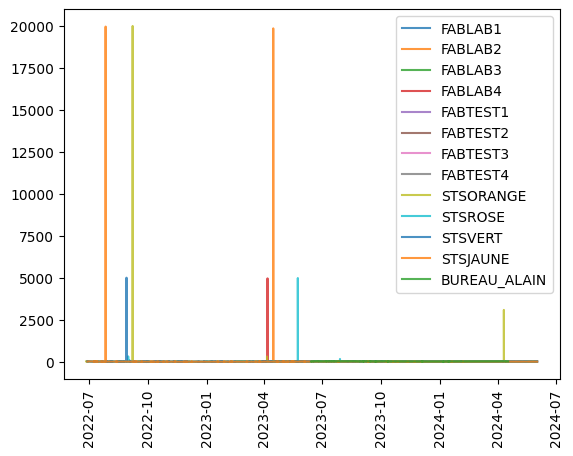

In [124]:
#plot how much data is recorded. mostly for fine tuning.
for sensor_name in sensors:
    plt.plot(raw_var[sensor_name], label=sensor_name, alpha=0.8)
    plt.xticks(rotation=90)
    plt.legend()
    #plt.show() #each sensor will have a seperate graph


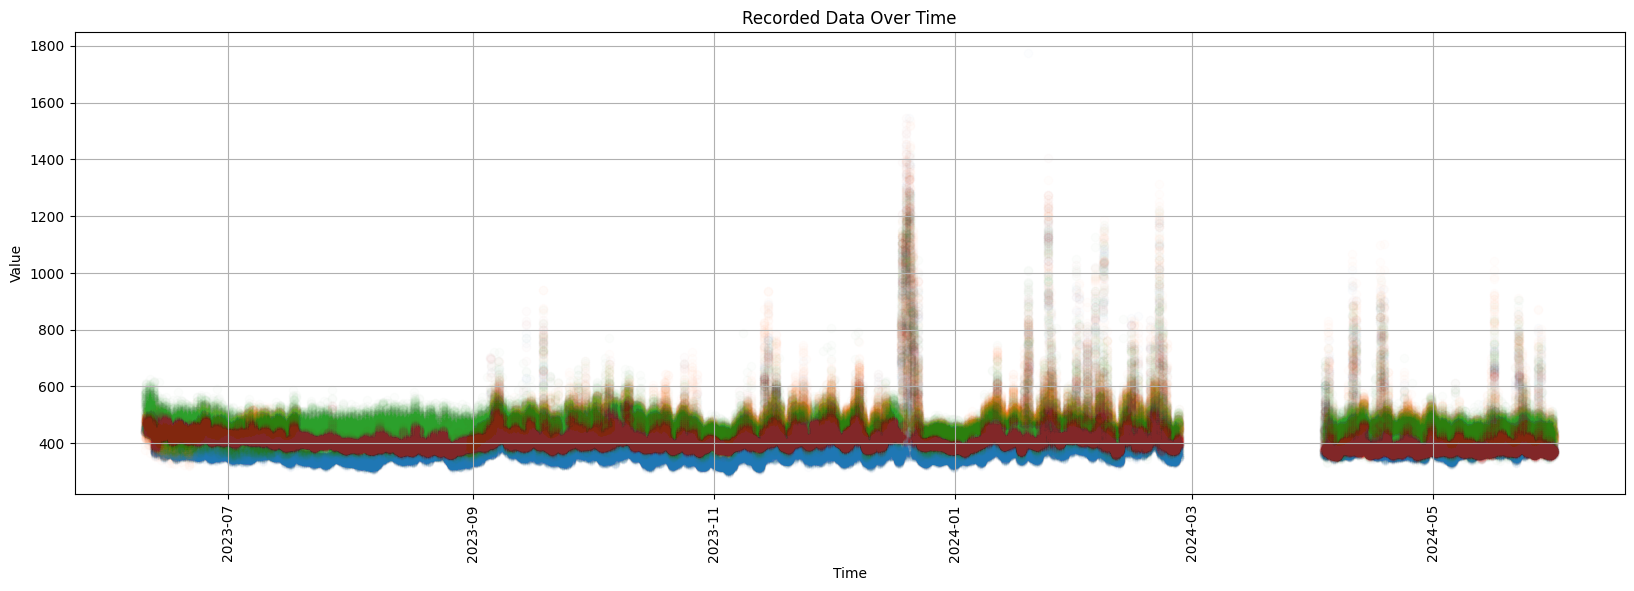

In [ ]:
#code showing the range of recorded data over time. used only to mark the start of data gathering and its gaps
'''
# Initialize the plot
plt.figure(figsize=(20, 6))

# Plot points for how much data is recorded from each sensor in one plot
for sensor_name in sensors:
    plt.scatter(
        raw_var[sensor_name].loc[start_date:end_date].index,
        raw_var[sensor_name].loc[start_date:end_date, 'var'],
        label=sensor_name,
        alpha=0.01  # Adjust transparency for better visibility
    )

# Set plot parameters
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Recorded Data Over Time')
plt.grid(True)

plt.show()
'''

In [ ]:
#MAIN CODE
#change dates, variables, sensors, tuning as per your request

# Times for calcs
start_date = '2022-06-01 00:00'
end_date = '2024-06-01 00:00'

# List of variables to investigate
variables = ['co2', 'temperature', 'humidity', 'voc', 'c2h5oh', 'co', 'no2', 'nh3', 'sound', 'light', 'pm1.0', 'pm2.5', 'pm10']
sensors =  ['FABLAB1', 'FABLAB2', 'FABLAB3', 'FABLAB4', 'FABTEST1', 'FABTEST2', 'FABTEST3', 'FABTEST4', 'STSORANGE', 'STSROSE', 'STSVERT', 'STSJAUNE', 'BUREAU_ALAIN']

# For each variable, perform the operations
for var in variables:
    raw_var = {}
    
    # Extract data for each sensor
    for sensor_name in sensors:
        date_file = f"{sensor_name}.xlsx"
        raw_data = pd.read_excel(date_file, index_col='date')
        
        raw_data = raw_data[~raw_data.index.duplicated(keep='first')]
        
        raw_var[sensor_name] = raw_data.loc[start_date:end_date, [var]].where((raw_data[var] > -1) & (raw_data[var] <= 40000), other=np.nan)
        raw_var[sensor_name].rename(columns={var: 'var'}, inplace=True)

    # Smooth out var
    smooth_raw_var = {}
    for sensor_name in sensors:
        smooth_raw_var[sensor_name] = savgol_filter(
            raw_var[sensor_name].loc[start_date:end_date, 'var'],
            window_length=5, polyorder=1, mode='nearest'
        )
        smooth_raw_var[sensor_name] = pd.DataFrame({'var': smooth_raw_var[sensor_name]}, index=raw_var[sensor_name].loc[start_date:end_date, 'var'].index)

    # Plot how much data is recorded
    for sensor_name in sensors:
        plt.plot(raw_var[sensor_name], label=sensor_name, alpha=0.8)
        plt.xticks(rotation=90)
        plt.legend()
        #plt.show() #each sensor will have a separate graph

    # Calculating derivatives
    derivative = {}
    rawvarworkday = pd.DataFrame()
    rawvarweekend = pd.DataFrame()
    for sensor_name in sensors:
        derivative[sensor_name] = pd.DataFrame(
            smooth_raw_var[sensor_name]['var'].diff() / smooth_raw_var[sensor_name].index.to_series().diff().dt.total_seconds(),
            index=smooth_raw_var[sensor_name].index
        )
        derivative[sensor_name] = derivative[sensor_name].resample('10min').mean()
        derivative[sensor_name]['time'] = derivative[sensor_name].index.strftime('%H:%M:%S').astype(str)

    for sensor_name in sensors:
        for h in range(7, 22): #modify frame of time
            for m in range(0, 60, 10):
                temp_time = f"{h:02d}:{m:02d}"
                rawvarworkday.loc[temp_time, sensor_name] = derivative[sensor_name].loc[(derivative[sensor_name]['time'].str.startswith(temp_time)) & (derivative[sensor_name].index.weekday < 5)][0].mean()
                rawvarweekend.loc[temp_time, sensor_name] = derivative[sensor_name].loc[(derivative[sensor_name]['time'].str.startswith(temp_time)) & (derivative[sensor_name].index.weekday >= 5)][0].mean()

    # Ensure the number of sensors is at least 12
    num_main_sensors = 12
    if len(sensors) > num_main_sensors:
        main_sensors = sensors[:num_main_sensors]
        last_sensor = sensors[num_main_sensors]
    else:
        main_sensors = sensors
        last_sensor = None

    # Create 12 subplots arranged in a 4x3 grid
    fig, axes = plt.subplots(4, 3, figsize=(32, 16))
    axes = axes.flatten()

    # Function to convert row-wise index to column-wise index
    def to_col_major_idx(idx, nrows=4):
        return (idx % nrows) * 3 + idx // nrows

    for i, sensor_name in enumerate(main_sensors):
        col_idx = to_col_major_idx(i)
        ax = axes[col_idx]
        ax.plot(rawvarworkday.index, rawvarworkday[sensor_name], label=f'{sensor_name} - Workdays')
        ax.plot(rawvarweekend.index, rawvarweekend[sensor_name], label=f'{sensor_name} - Weekends')
        # Plot for stabilized (people - noise)
        stabilized = rawvarworkday[sensor_name] - rawvarweekend[sensor_name]
        ax.plot(rawvarworkday.index, stabilized, label=f'{sensor_name} - Stabilized')
        ax.set_xticks(rawvarworkday.index[::6])
        ax.xaxis.set_major_locator(ticker.MultipleLocator(base=6))  # Adjust as necessary
        ax.set_title(f'{var.upper()} Levels of {sensor_name}')
        ax.legend()
        ax.grid(True)
        ax.tick_params(axis='x', rotation=90)

    # Hide any extra subplots if less than 12 sensors
    if len(main_sensors) < len(axes):
        for i in range(len(main_sensors), len(axes)):
            if i >= len(main_sensors):
                axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    # Plot 'BUREAU_ALAIN' separately, as 13 is prime
    fig, ax = plt.subplots(figsize=(8.2, 4))
    ax.plot(rawvarworkday.index, rawvarworkday['BUREAU_ALAIN'], label='BUREAU_ALAIN - Workdays')
    ax.plot(rawvarweekend.index, rawvarweekend['BUREAU_ALAIN'], label='BUREAU_ALAIN - Weekends')
    stabilized = rawvarworkday['BUREAU_ALAIN'] - rawvarweekend['BUREAU_ALAIN']
    ax.plot(rawvarworkday.index, stabilized, label='BUREAU_ALAIN - Stabilized')
    ax.set_xticks(rawvarworkday.index[::6])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=6))  # Adjust as necessary
    ax.set_title(f'{var.upper()} Levels of BUREAU_ALAIN')
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
